In [7]:
import numpy as np

In [6]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

In [5]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0


In [8]:
# Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)



[]
[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


In [7]:
## work for task 2!
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    print(f"For p1 = {p1}:")
    print("   Error in market clearing condition 1:", eps1)
    print("   Error in market clearing condition 2:", eps2)



For p1 = 0.5:
   Error in market clearing condition 1: 0.5333333333333332
   Error in market clearing condition 2: -0.2666666666666666
For p1 = 0.527:
   Error in market clearing condition 1: 0.4752688172043007
   Error in market clearing condition 2: -0.2504666666666665
For p1 = 0.553:
   Error in market clearing condition 1: 0.4247136829415309
   Error in market clearing condition 2: -0.23486666666666645
For p1 = 0.58:
   Error in market clearing condition 1: 0.3770114942528733
   Error in market clearing condition 2: -0.2186666666666665
For p1 = 0.607:
   Error in market clearing condition 1: 0.3335529928610652
   Error in market clearing condition 2: -0.20246666666666646
For p1 = 0.633:
   Error in market clearing condition 1: 0.2952080042127434
   Error in market clearing condition 2: -0.18686666666666651
For p1 = 0.66:
   Error in market clearing condition 1: 0.25858585858585836
   Error in market clearing condition 2: -0.1706666666666664
For p1 = 0.687:
   Error in market cleari

In [9]:
## das ergebnis von aufgabe 3 sollte 0.94 sein
import numpy as np

def calculate_excess_demand(model, p1):
    xA1, xA2 = model.demand_A(p1)
    xB1, xB2 = model.demand_B(p1)
    excess_demand_1 = xA1 + xB1 - (model.par.w1A + (1 - model.par.w1A))
    return excess_demand_1

print(calculate_excess_demand(model, 20))

def find_equilibrium_price(model, p_range, num_steps=1000, tolerance=1e-6):
    equilibrium_price = None
    min_excess_demand = 0
    
    for p1 in p_range:
        excess_demand_1 = calculate_excess_demand(model, p1)
        if excess_demand_1 < min_excess_demand:
            min_excess_demand = excess_demand_1
            equilibrium_price = p1
        if excess_demand_1 < tolerance:
            break
    return equilibrium_price

# Assuming you have defined model and p1_range elsewhere
p1_range = np.arange(0.00001, 1000)
equilibrium_price = find_equilibrium_price(model, p1_range)
print(equilibrium_price)
# Example usage
# model = YourModelClass()
# equilibrium_price = find_equilibrium_price(model, np.arange(0, 100))

# if equilibrium_price is not None:
#     print("Equilibrium price:", equilibrium_price)
# else:
#     print("Equilibrium price not found.")


-0.5716666666666667
1.00001


/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  demand_x1 =  self.par.alpha * (p1*self.par.w1A + self.par.w2A)/p1
/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  demand_x1 = self.par.beta * (p1* (1-self.par.w1A) + 1- self.par.w2A)/p1


0.0009523809523811488
0.0009009009009011137


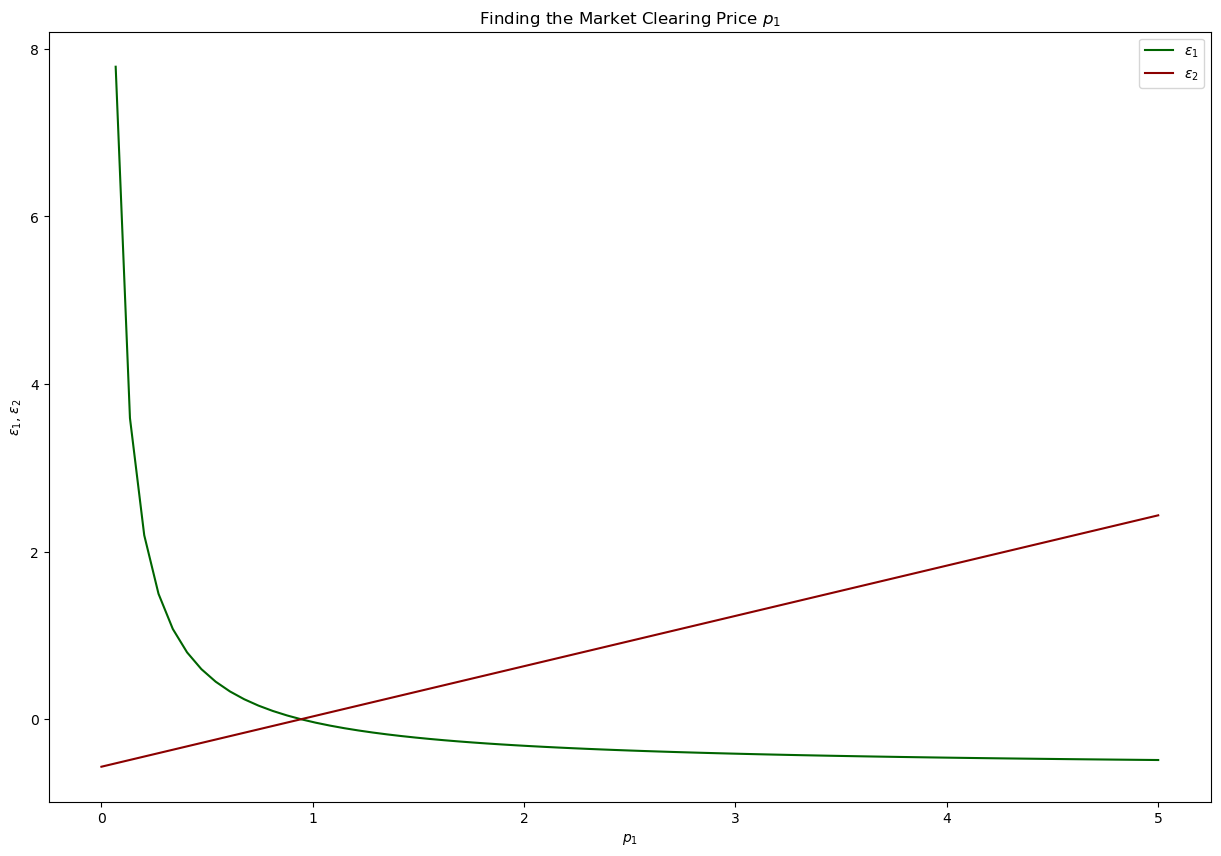

Intersection point: 0.9324324324324325


In [10]:
### DOING IT GRAPHICALLY
## Task 3
N  = 75
import matplotlib.pyplot as plt
P1 = np.linspace(0, 5, N)

# Calculate market clearing errors for each p1 in P1
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1) ## add 
    epsilon_2.append(eps2)

print(np.min(np.abs(epsilon_1)))
print(np.min(np.abs(epsilon_2)))


# Plotting
plt.figure(figsize=(15, 10))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
plt.legend()
plt.show()


## for which p1 do we get the intersection? 
# Find the point of intersection
# Find the point of intersection
intersection_point = None
for i in range(1, len(P1)):
    if (epsilon_1[i] > 0 and epsilon_2[i] < 0) or (epsilon_1[i] < 0 and epsilon_2[i] > 0):
        intersection_point = 1-P1[i]
    
        break  # Exit the loop after the first intersection is found since there is only market clearing price

print("Intersection point:", intersection_point)

In [11]:
## task 4 
## use either grid search or numerical optimizer!! 
## starting with a). 
## WE WANT TO MAXIMIZE THE UTILITY OF PERSON A WHEN ONLY PRICES IN P1 CAN BE CHOSEN 
# from Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)
type(P1)



[]
[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


numpy.ndarray

In [40]:
# Define the initial guess
x0 = [0.5, 0.5]  # Initial guess for x_B
negative_utility = -np.inf
value = []
x1_0 = np.nan
x2_0 = np.nan
p_solution = np.nan

# from Question 2
## defining p1 
N = 75  ## from task
P1 = []
print(P1)
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)


for p1 in P1: 
     x1B, x2B = model.demand_B(p1) 
     #if 1 - x1 >= 0 and 1-x2 >= 0: 
     #if 1 - x1B >= 0 and 1-x2B >= 0: 
     if 1 - x1B >= 0 and 1-x2B >= 0:
          x1A = 1 - x1B 
          x2A = 1 - x2B
          if 1-x1A >= 0 and 1-x2A >= 0: 
               utility_A_now = model.utility_A(x1A, x2A)
               if utility_A_now > negative_utility: 
                    negative_utility = utility_A_now
          #value.append(negative_utility)
                    x1_0 = x1A
                    x2_0 = x2A
                    p_solution = p1



print(x1_0) ## this is the best value for x1
print(x2_0) ## this is a the best_value for x2
print(p_solution)
#print(model.demand_A(p_solution))


[]
0.6193605370075959
0.6408666666666667
1.887


In [17]:
## solution petra: 0.953
negative_utility = -np.inf
value = []
x1_0 = []
x2_0 = []
p_solution = np.nan

N = 75  ## from task
P1 = []
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)


for p1 in P1: 
    x1B, x2B = model.demand_B(p1) 
    x1A = 1 - x1B 
    x2A = 1 - x2B
    utility_A_now = model.utility_A(1-x1B, 1-x2B)
    if utility_A_now > negative_utility: 
        negative_utility = utility_A_now
        x1_0.append(x1A)
        x2_0.append(x2A)
        p_solution = p1

print("Maximum Utility for A:", negative_utility)
print("Optimal x1 for A:", x1_0)
print("Optimal x2 for A:", x2_0)
print("Optimal price:", p_solution)
print("Demand for A at optimal price:", model.demand_A(p_solution))

[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]
Maximum Utility for A: 0.6336162385929179
Optimal x1 for A: [0.0227848101265824, 0.062068965517241614, 0.097858319604613, 0.12943654555028972, 0.15959595959595985, 0.18738476467734133, 0.21215521271622273, 0.23603603603603618, 0.2582355497609735, 0.2781841109709965, 0.29756097560975625, 0.3157024793388431, 0.33211149293623543, 0.3481481481481483, 0.3632506292700468, 0.37698495977614555, 0.39047619047619053, 0.4032439589539887, 0.41490803484995176, 0.42641509433962277, 0.4373505059797609, 0.4473794549266249, 0.4573099415204679, 0.4

/Users/darjababan/Desktop/projects-2024-darja-eloise-christian-1/inauguralproject/ExchangeEconomy.py:19: RuntimeWarning: invalid value encountered in scalar power
  return x1A**(self.par.alpha)*x2A**(1-self.par.alpha)


In [145]:
for p1 in P1: 
     x1B, x2B = model.demand_B(p1) 
     if 1 - x1B >= 0 and 1 - x2B >= 0:
          x1A = 1 - x1B 
          x2A = 1 - x2B
          print("x1A:", x1A)
          print("x2A:", x2A)
          if 1 - x1A >= 0 and 1 - x2A >= 0:
               utility_A_now = model.utility_A(x1A, x2A)
               print("Utility for A:", utility_A_now)
               if utility_A_now > negative_utility: 
                    negative_utility = utility_A_now
                    x1_0.append(x1A)
                    x2_0.append(x2A)
                    p_solution = p1

print(p_solution)
print(model.demand_A(p_solution))


x1A: 0.0227848101265824
x2A: 0.7298
Utility for A: 0.22980053950806573
x1A: 0.062068965517241614
x2A: 0.728
Utility for A: 0.32041469224772584
x1A: 0.097858319604613
x2A: 0.7262
Utility for A: 0.37230889678760876
x1A: 0.12943654555028972
x2A: 0.7244666666666666
Utility for A: 0.40803546299855636
x1A: 0.15959595959595985
x2A: 0.7226666666666666
Utility for A: 0.43681677975714284
x1A: 0.18738476467734133
x2A: 0.7208666666666667
Utility for A: 0.46006026138977724
x1A: 0.21215521271622273
x2A: 0.7191333333333334
Utility for A: 0.4787302260078413
x1A: 0.23603603603603618
x2A: 0.7173333333333334
Utility for A: 0.4952298102127464
x1A: 0.2582355497609735
x2A: 0.7155333333333334
Utility for A: 0.5094386878686699
x1A: 0.2781841109709965
x2A: 0.7138
Utility for A: 0.5213889258910739
x1A: 0.29756097560975625
x2A: 0.712
Utility for A: 0.5323271952460383
x1A: 0.3157024793388431
x2A: 0.7101999999999999
Utility for A: 0.542017251357126
x1A: 0.33211149293623543
x2A: 0.7084666666666666
Utility for A: 0.

In [46]:
### 4b 
p = 0
### 4b 
## use solver since P1 needs to positve 
from scipy import optimize

def constraint_p(p):
    return p  # This ensures that p is non-negative

#def constraints(p):
 #   x1A, x2A = model.demand_A(p)
#   x1B, x2B = model.demand_B(p)
#  return [x1A + x1B - 1, x2A + x2B - 1, p]  # Ensuring demands sum up to 1 and p is non-negative

constraints ={'type': 'ineq', 'fun': constraint_p} ## adding constraint for p 
## we have to somehow add that x1_A and x2_A need to be between 0 and 1 and x1_A + x1_B sums to 1 as well as
## as x2_A + x2_B = 1 

## bounds for solutions
bounds = [(0,None)] ## non negative price 

# c. call solver, use SLSQP
initial_guess = 1
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
model.negative_utility_A, initial_guess, bounds = bounds,
method='SLSQP',constraints= constraints)

p_optimum = sol_case2.x
print(p_optimum) ## optimal price 
#print(model.demand_A(p_optimum)) ## can this really be?
print(1-model.demand_B(p_optimum)[0], 1-model.demand_B(p_optimum)[1])
x1_sol_4b = 1-model.demand_B(p_optimum)[0]
x2_sol_4b = 1-model.demand_B(p_optimum)[1]
print(model.negative_utility_A(p_optimum))




[1.89678021]
[0.6206357] [0.64021465]
[-0.63362065]


In [18]:
## task 5a 
# code for solving the model 
## this code is mainly from task 1!
par = model.par
parameters = model.par
utility_personA = model.utility_A(parameters.w1A, parameters.w2A)
utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB


## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))

#print(pareto_improvements)

utility_start = -50
x1_start = 0
x2_start = 0
x_start = [0,0]
## here you solve the model 
for x in pareto_improvements: 
    if model.utility_A(x[0],x[1]) > utility_start: 
        utility_start = model.utility_A(x_start[0], x_start[1])
        x_start[0] = x[0]
        x_start[1] = x[1]

print(x_start) ## optimal allocation 
#print(x2_start)
print(model.utility_A(x_start[0], x_start[1])) ## maximized utility 

[0.5733333333333334, 0.8400000000000001]
0.7395858408079152


In [38]:
# Now we use the library scipy to do the heavy lifting
from scipy import optimize

In [60]:
## 5b 
## for consumer B needs to be as well off as with his endowment
constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(model.par.w1A, model.par.w2A)})
## bounds for solutions
bounds = ((0, 1), (0, 1)) 

# c. call solver, use SLSQP
initial_guess = [0.5, 0.5]
## slsqp als method kann bounds und constrains annehmen
sol_case2 = optimize.minimize(
    model.negative_utility_A_5b, initial_guess,
    method='SLSQP', bounds=bounds, constraints=constraints)

x1_optimal_5b = sol_case2.x[0]
x2_optimal_5b = sol_case2.x[1]
print(sol_case2.x[0]) ## optimal amount for person A of good 1
print(sol_case2.x[1]) ## optimal amount for person A of good 2
print(model.utility_A(x1_optimal_5b, x2_optimal_5b))

0.2894589077763789
0.6197031391672588
0.4808224869622358


In [ ]:
b = [0.5,1]
model.aggregate_utility(b)

In [31]:
## task 6a 
# Define the objective function to maximize aggregate utility 
## better to define this inside the exchange economy 
#def aggregate_utility(x):
 #   xA1, xA2 = x
 #   return -(model.utility_A(xA1, xA2) + model.utility_B(1 - xA1, 1 - xA2))

# Define the constraints for xA1 and xA2
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]})

# Bounds for solutions
bounds = ((0, 1), (0, 1)) ## both can only be between 0 and 1 

# Call the solver, use SLSQP
initial_guess = [0.5, 0.5]

sol = optimize.minimize(model.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Unpack solution
xA1_optimal = sol.x[0]
xA2_optimal = sol.x[1]
utility_A = model.utility_A(xA1_optimal, xA2_optimal)
utility_B = model.utility_B(1 - xA1_optimal, 1 - xA2_optimal)

# Print the solution
print("Optimal Allocation:")
print("xA1:", xA1_optimal)
print("xA2:", xA2_optimal)
print("xB1:", 1-xA1_optimal)
print("xB2:", 1-xA2_optimal)
print("Utility for A:", utility_A)
print("Utility for B:", utility_B)

Optimal Allocation:
xA1: 0.33341166147388446
xA2: 0.6665883190561481
xB1: 0.6665883385261155
xB2: 0.3334116809438519
Utility for A: 0.5291336663821624
Utility for B: 0.5291336869853834


0.33341166147388446


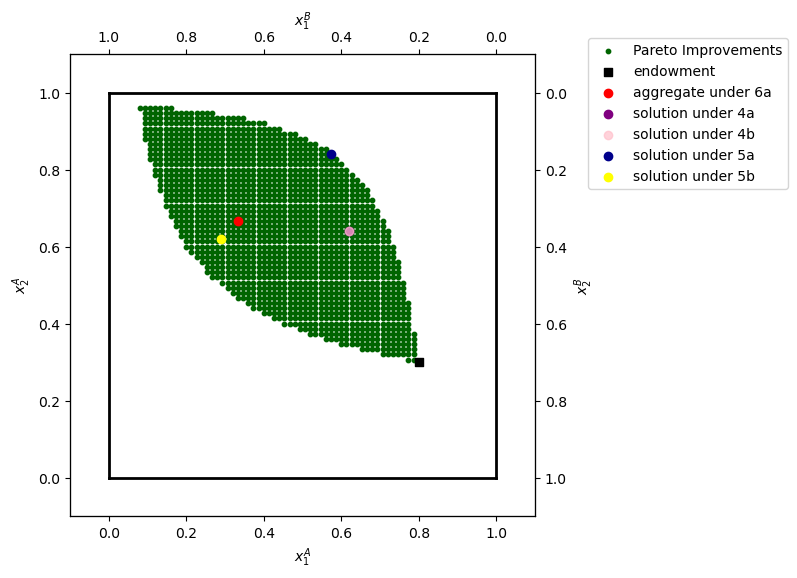

In [64]:
## task 6b 
import numpy as np
model = ExchangeEconomyClass()
parameters = model.par

utility_personA = model.utility_A(parameters.w1A, parameters.w2A)

utility_personB = model.utility_B(1-parameters.w1A, 1-parameters.w2A)

print(xA1_optimal)

# code for solving the model 
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

## here define the function for comparison
def is_pareto(x1A, x2A): 
    x1B, x2B = 1 - x1A, 1 - x2A
    return model.utility_A(x1A, x2A) >= utility_personA and model.utility_B(x1B, x2B) >= utility_personB

## loop over x1 and x2 and get all combinations
N = 75 ## given in the Task! 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if is_pareto(x1A, x2A):
            pareto_improvements.append((x1A, x2A))



# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

#Plotting Pareto improvements, initial endowment and previous solutions of the different tasks
pareto_improvements = np.array(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='darkgreen', label='Pareto Improvements', s=10)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
## plotting 6b 
ax_A.scatter(xA1_optimal, xA2_optimal,marker='o',color='red',label='aggregate under 6a')
## plotting 4a 
ax_A.scatter(x1_0, x2_0, marker = 'o', color = "purple", label = "solution under 4a")
## plotting 4b 
ax_A.scatter(x1_sol_4b, x2_sol_4b, marker = 'o', color = "pink", alpha = 0.7, label = "solution under 4b")
## plotting 5a 
ax_A.scatter(x_start[0], x_start[1], marker = 'o', color = "darkblue", label = "solution under 5a")
## plotting 5b 
ax_A.scatter(x1_optimal_5b, x2_optimal_5b, marker = 'o', color = "yellow", label = "solution under 5b")

## add legend with pareto improvments, initial endowments and all solutions of the previous tasks 
ax_A.legend(bbox_to_anchor=(1.1, 1.05)) ## adding bbox_to_anchor to shift the plot a bit out of the plot! 




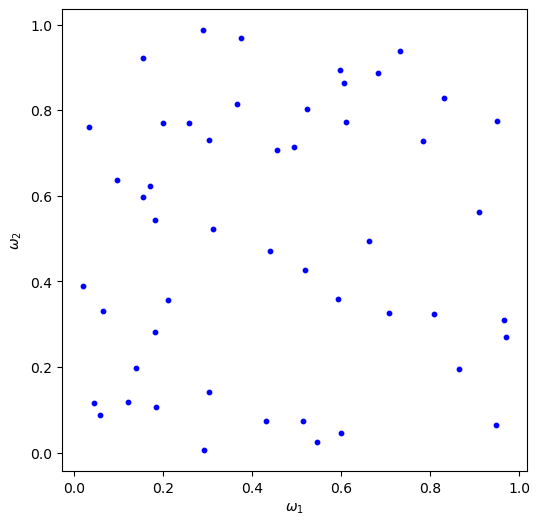

In [23]:
## task 7 

import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Generate the set W with 50 elements
omega_1 = np.random.rand(50,1)
omega_2 = np.random.rand(50,1)


# Plotting setup
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

# Axis labels and inverted axes for B
ax_A.set_xlabel("$\\omega_1$")
ax_A.set_ylabel("$\\omega_2$")


ax_A.scatter(omega_1, omega_2, color='blue', label='Pareto Improvements', s=10)

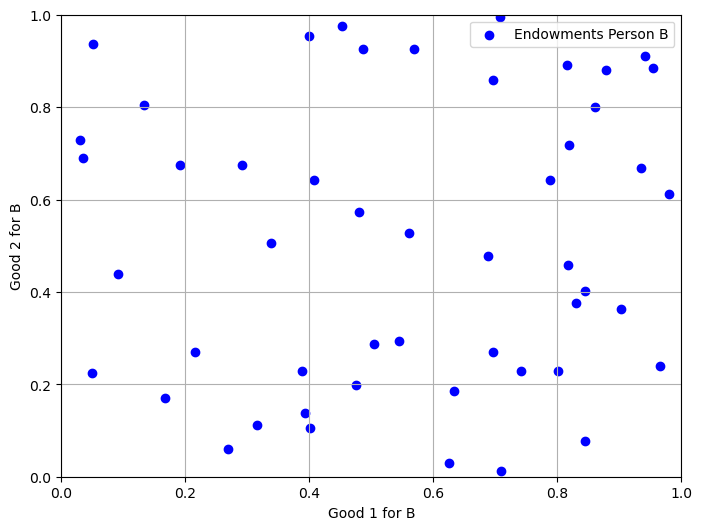

In [180]:
wB2_values = []
wB1_values = []

for wA1 in omega_1: 
    wB1_values.append(1-wA1)


for wA2 in omega_2:
        wB2_values.append(1-wA2)


len(wB2_values)
len(wB1_values)


plt.figure(figsize=(8, 6))
plt.scatter(wB1_values, wB2_values, label='Endowments Person B', color='blue')
plt.xlabel('Good 1 for B')
plt.ylabel('Good 2 for B')
#plt.title('Edgeworth Box - Market Equilibrium Allocations')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [181]:
### NECESSARY TO RUN OPTIMIZE.MINIMIZE IN TASK 8 
type(omega_1)
omega_1_list = np.ndarray.tolist(omega_1)
type(omega_1_list)

type(omega_2)
omega_2_list = np.ndarray.tolist(omega_2)
type(omega_2_list)

list

In [182]:
for w1A, w2A in zip(omega_1_list, omega_2_list): 
    print(w1A, w2A)

[0.3745401188473625] [0.9695846277645586]
[0.9507143064099162] [0.7751328233611146]
[0.7319939418114051] [0.9394989415641891]
[0.5986584841970366] [0.8948273504276488]
[0.15601864044243652] [0.5978999788110851]
[0.15599452033620265] [0.9218742350231168]
[0.05808361216819946] [0.0884925020519195]
[0.8661761457749352] [0.1959828624191452]
[0.6011150117432088] [0.045227288910538066]
[0.7080725777960455] [0.32533033076326434]
[0.020584494295802447] [0.388677289689482]
[0.9699098521619943] [0.2713490317738959]
[0.8324426408004217] [0.8287375091519293]
[0.21233911067827616] [0.3567533266935893]
[0.18182496720710062] [0.28093450968738076]
[0.18340450985343382] [0.5426960831582485]
[0.3042422429595377] [0.14092422497476265]
[0.5247564316322378] [0.8021969807540397]
[0.43194501864211576] [0.07455064367977082]
[0.2912291401980419] [0.9868869366005173]
[0.6118528947223795] [0.7722447692966574]
[0.13949386065204183] [0.1987156815341724]
[0.29214464853521815] [0.005522117123602399]
[0.3663618432936

In [92]:
for w1A_list, w2A_list in zip(omega_1_list, omega_2_list):
    for w1A, w2A in zip(w1A_list, w2A_list):
        print(w1A, w2A)

0.3745401188473625 0.9695846277645586
0.9507143064099162 0.7751328233611146
0.7319939418114051 0.9394989415641891
0.5986584841970366 0.8948273504276488
0.15601864044243652 0.5978999788110851
0.15599452033620265 0.9218742350231168
0.05808361216819946 0.0884925020519195
0.8661761457749352 0.1959828624191452
0.6011150117432088 0.045227288910538066
0.7080725777960455 0.32533033076326434
0.020584494295802447 0.388677289689482
0.9699098521619943 0.2713490317738959
0.8324426408004217 0.8287375091519293
0.21233911067827616 0.3567533266935893
0.18182496720710062 0.28093450968738076
0.18340450985343382 0.5426960831582485
0.3042422429595377 0.14092422497476265
0.5247564316322378 0.8021969807540397
0.43194501864211576 0.07455064367977082
0.2912291401980419 0.9868869366005173
0.6118528947223795 0.7722447692966574
0.13949386065204183 0.1987156815341724
0.29214464853521815 0.005522117123602399
0.3663618432936917 0.8154614284548342
0.45606998421703593 0.7068573438476171
0.7851759613930136 0.7290071680

In [183]:
con1 = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-w1A, 1-w2A)})
con2 = ({'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - model.utility_A(w1A, w2A)})
cons = [con1,con2]
bounds = ((0, 1), (0, 1))
market_equilibrium = []
# Use solver 

for w1A_list, w2A_list in zip(omega_1_list, omega_2_list):
    for w1A, w2A in zip(w1A_list, w2A_list):
    # Define constraints inside the loop with specific values of w1A and w2A
        x0 = [w1A, w2A]
        sol = optimize.minimize(model.aggregate_utility, x0, method="SLSQP", bounds=bounds, constraints=cons)
        market_equilibrium.append(sol.x)

market_equilibrium

[array([0.52747094, 0.81702539]),
 array([0.70009807, 0.90327837]),
 array([0.75510835, 0.9250077 ]),
 array([0.63027006, 0.87209831]),
 array([0.21966402, 0.52963337]),
 array([0.3330673 , 0.66666243]),
 array([0.0359672 , 0.12983567]),
 array([0.33342627, 0.66675946]),
 array([0.32913303, 0.66246268]),
 array([0.3332257, 0.6667601]),
 array([0.09205008, 0.28865489]),
 array([0.33355146, 0.66758022]),
 array([0.70051298, 0.90341188]),
 array([0.16061199, 0.43359237]),
 array([0.12717041, 0.36816773]),
 array([0.20861774, 0.51309326]),
 array([0.15328047, 0.419946  ]),
 array([0.51523327, 0.80957662]),
 array([0.21226409, 0.5187492 ]),
 array([0.46787106, 0.77861313]),
 array([0.53817902, 0.82340742]),
 array([0.09002041, 0.28347552]),
 array([0.1208757 , 0.35526169]),
 array([0.43111619, 0.75172826]),
 array([0.41592126, 0.74018785]),
 array([0.58124426, 0.84729722]),
 array([0.33332337, 0.66666328]),
 array([0.2671422 , 0.59317835]),
 array([0.33330688, 0.66693273]),
 array([0.037011

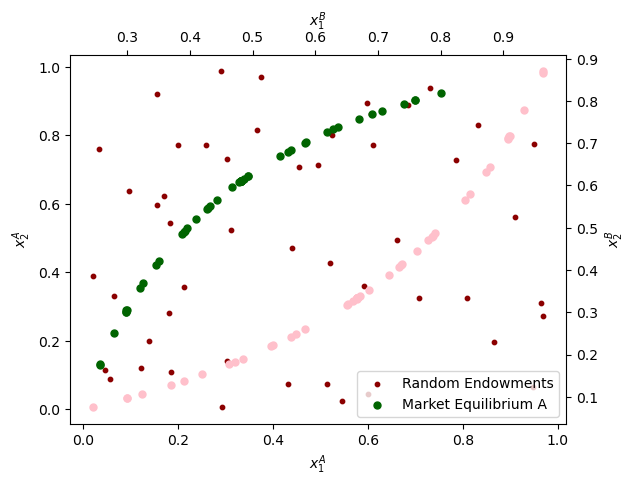

In [179]:
## plotting solution task 8 
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

#Plotting market equilibrium 
market_equilibrium_A = np.array(market_equilibrium)
ax.scatter(omega_1, omega_2, color='darkred', label='Random Endowments', s=10)
ax.scatter(market_equilibrium_A[:, 0], market_equilibrium_A[:, 1], color='darkgreen', label='Market Equilibrium A', s=25)
ax.set_xlabel("$x_1^A$")
ax.set_ylabel("$x_2^A$")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
#ax.set_xlim([0,1]) ## talk about this! 
#ax.set_ylim([0,1])    
#ax2.set_xlim([1, 0.1])
#ax2.set_ylim([1,0.1])


ax2.scatter(1-market_equilibrium_A[:, 0],1-market_equilibrium_A[:, 1], color='pink', label='Market Equilibrium B', s=25)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("$x_1^B$")
ax2.set_ylabel("$x_2^B$")    
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')

ax.legend()
ax.legend() ## add that one too? + endowments in the back? 